# Fake news detection on Hindi news articles using Bidirectional LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('Updated_v1/train.csv')
data.head()

,Unnamed: 0,id,title,text,author,label
0,0,13867,गायिका काया जोन्स ने ट्रम्प के लिए किया समर्थन...,गायिका और डीजे काया जोन्स ने इस हफ्ते डोनाल्ड ...,डैनियल नुसबम,0
1,1,13868,रवेन्स के मालिक स्टीव बिसियोट्टी: एनएफएल को पा...,"""यह होने वाला नहीं है"" विभाग से, बाल्टीमोर रेव...",रॉबर्ट जे। मार्लो,0
2,2,13869,टिलरसन: फिलिस्तीनी प्राधिकरण आतंकवादियों को भु...,टाइम्स ऑफ इज़राइल की रिपोर्ट: वॉशिंगटन - अमेरि...,ब्रेइटबार्ट जेरूसलम,0
3,3,13870,संतरे के लिए सेब - पहले 100 दिन की योजनाओं में...,राष्ट्रपति चुनाव में एक विशेष विषय उनके पहले 1...,नताली डेली,1
4,4,13871,क्रेमलिन: क्लिंटन-ट्रम्प समीकरण पुतिन को पसंद ...,लिंक को कॉपी करें http://ar.rt.com/i5gh क्रेमल...,NaN,1


In [3]:
# checking for Null values
data.isnull().sum()

Unnamed: 0       0
id               0
title          327
text            66
author        1131
label            0
dtype: int64

In [4]:
# Dropping Null values
data = data.dropna()
data.isnull().sum()

Unnamed: 0    0
id            0
title         0
text          0
author        0
label         0
dtype: int64

In [5]:
x= data.drop('label',axis=1)

In [6]:
y = data['label']

# Natural Language Processing

In [7]:
temp = x.copy()
temp

,Unnamed: 0,id,title,text,author
0,0,13867,गायिका काया जोन्स ने ट्रम्प के लिए किया समर्थन...,गायिका और डीजे काया जोन्स ने इस हफ्ते डोनाल्ड ...,डैनियल नुसबम
1,1,13868,रवेन्स के मालिक स्टीव बिसियोट्टी: एनएफएल को पा...,"""यह होने वाला नहीं है"" विभाग से, बाल्टीमोर रेव...",रॉबर्ट जे। मार्लो
2,2,13869,टिलरसन: फिलिस्तीनी प्राधिकरण आतंकवादियों को भु...,टाइम्स ऑफ इज़राइल की रिपोर्ट: वॉशिंगटन - अमेरि...,ब्रेइटबार्ट जेरूसलम
3,3,13870,संतरे के लिए सेब - पहले 100 दिन की योजनाओं में...,राष्ट्रपति चुनाव में एक विशेष विषय उनके पहले 1...,नताली डेली
6,6,13873,डोनाल्ड ट्रम्प के अभियान में शांत फिक्सर: उनके...,"अंतर्राष्ट्रीय कूटनीति सावधान अनुष्ठानों, पदान...",माइकल बारबरो और जोनाथन महलर
...,...,...,...,...,...
13862,13862,6794,वकील ने पूर्व सहयोगी और ब्रिज प्लॉट के पहले के...,"NEWARK - ब्रिजेट ऐनी केली ने अपने बॉस, न्यू जर...",केट ज़र्निकी
13863,13863,6795,वे शांति के कबूतर को ड्रोन से बदल देते हैं,वे एक ड्रोन के साथ शांति के कबूतर को दुनिया के...,मसौदा
13864,13864,6796,2:00 PM वाटर कूलर 11/4/2016,By Lambert Strether of Corrente . \nTPP/TTIP/T...,लैम्बर्ट स्ट्रेथर
13865,13865,6797,यात्रियों को उपकरणों पर नए प्रतिबंधों के बारे ...,सैन फ्रांसिस्को - संयुक्त राज्य अमेरिका के डिप...,ब्रायन एक्स। चेन


In [8]:
temp.reset_index(inplace=True)
temp

,index,Unnamed: 0,id,title,text,author
0,0,0,13867,गायिका काया जोन्स ने ट्रम्प के लिए किया समर्थन...,गायिका और डीजे काया जोन्स ने इस हफ्ते डोनाल्ड ...,डैनियल नुसबम
1,1,1,13868,रवेन्स के मालिक स्टीव बिसियोट्टी: एनएफएल को पा...,"""यह होने वाला नहीं है"" विभाग से, बाल्टीमोर रेव...",रॉबर्ट जे। मार्लो
2,2,2,13869,टिलरसन: फिलिस्तीनी प्राधिकरण आतंकवादियों को भु...,टाइम्स ऑफ इज़राइल की रिपोर्ट: वॉशिंगटन - अमेरि...,ब्रेइटबार्ट जेरूसलम
3,3,3,13870,संतरे के लिए सेब - पहले 100 दिन की योजनाओं में...,राष्ट्रपति चुनाव में एक विशेष विषय उनके पहले 1...,नताली डेली
4,6,6,13873,डोनाल्ड ट्रम्प के अभियान में शांत फिक्सर: उनके...,"अंतर्राष्ट्रीय कूटनीति सावधान अनुष्ठानों, पदान...",माइकल बारबरो और जोनाथन महलर
...,...,...,...,...,...,...
12357,13862,13862,6794,वकील ने पूर्व सहयोगी और ब्रिज प्लॉट के पहले के...,"NEWARK - ब्रिजेट ऐनी केली ने अपने बॉस, न्यू जर...",केट ज़र्निकी
12358,13863,13863,6795,वे शांति के कबूतर को ड्रोन से बदल देते हैं,वे एक ड्रोन के साथ शांति के कबूतर को दुनिया के...,मसौदा
12359,13864,13864,6796,2:00 PM वाटर कूलर 11/4/2016,By Lambert Strether of Corrente . \nTPP/TTIP/T...,लैम्बर्ट स्ट्रेथर
12360,13865,13865,6797,यात्रियों को उपकरणों पर नए प्रतिबंधों के बारे ...,सैन फ्रांसिस्को - संयुक्त राज्य अमेरिका के डिप...,ब्रायन एक्स। चेन


In [9]:
input_array=np.array(temp['title'])
len(input_array)

12362

In [10]:
import nltk
import re
from nltk.corpus import stopwords

In [11]:
# stopwords
stopwords_hindi =[
 'अत','अपना','अपनी','अपने','अभी','अंदर','आदि','आप','इत्यादि','इन','इनका','इन्हीं','इन्हें','इन्हों','इस','इसका','इसकी','इसके','इसमें',
'इसी','इसे','उन','उनका','उनकी','उनके','उनको','उन्हीं','उन्हें','उन्हों','उस','उसके','उसी','उसे','एक','एवं','एस','ऐसे','और','कई',
'कर','करता','करते','करना','करने','करें','कहते','कहा','का','काफ़ी','कि','कितना','किन्हें','किन्हों','किया','किर','किस','किसी','किसे','की',
'कुछ','कुल','के','को','कोई','कौन','कौन','बही','बहुत','बाद','बाला','बिलकुल','भी','भीतर','मगर','मानो','मे','में','यदि','यह','यहाँ','यही',
'या','यिह','ये','रखें','रहा','रहे','ऱ्वासा','लिए','लिये','लेकिन','व','वग़ैरह','वर्ग','वह','वहाँ','वहीं','वाले','वुह','वे','सकता','सकते','सबसे',
'सभी','साथ','साबुत','साभ','सारा','से','सो','संग','ही','हुआ','हुई','हुए','है','हैं','हो','होता','होती','होते','होना','होने']

In [12]:
stopwords= stopwords_hindi

# Check out the distribution of fake news compare to real news

In [13]:
fake_df=(data['label'] == 0) 
real_df=(data['label'] == 1)

Text(0, 0.5, 'Proportion of News Articles')

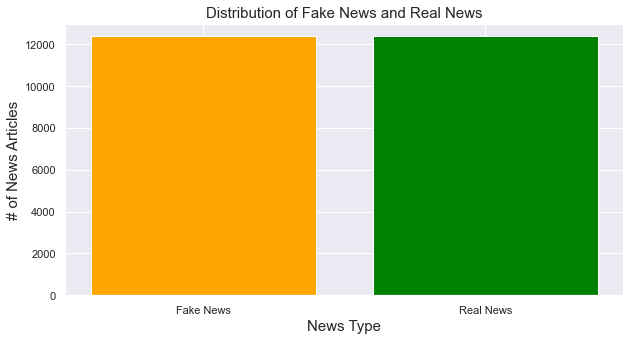

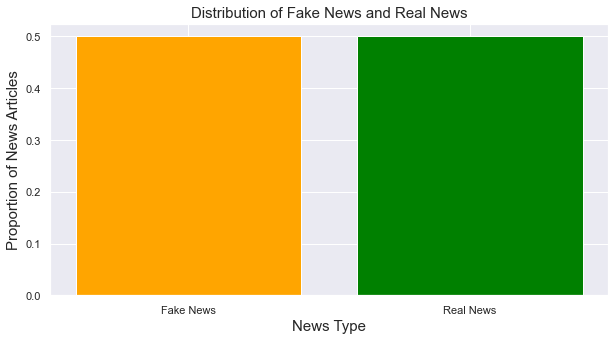

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df), color='orange')
plt.bar('Real News', len(real_df), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)
plt.savefig('news.jpg',bbox_inches = 'tight',transparent=True)

total_len = len(fake_df) + len(real_df)
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df) / total_len, color='orange')
plt.bar('Real News', len(real_df) / total_len, color='green')
plt.title('Distribution of Fake News and Real News', size=15)

plt.xlabel('News Type', size=15)
plt.ylabel('Proportion of News Articles', size=15)



# Text Processing

In [15]:
import re
import nltk
# ltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,len(input_array)):
    review = input_array[i]
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords_hindi)]
    review = ' '.join(review)
    corpus.append(review)
corpus

["गायिका काया जोन्स ने ट्रम्प समर्थन, 'ताकत' जॉय विला धन्यवाद",
 'रवेन्स मालिक स्टीव बिसियोट्टी: एनएफएल पानी देने योग्य बनाने विज्ञापनों कटौती - ब्रेइटबार्ट',
 'टिलरसन: फिलिस्तीनी प्राधिकरण आतंकवादियों भुगतान पर inian इरादा ’',
 'संतरे सेब - पहले 100 दिन योजनाओं कठोर अंतर (वीडियो)',
 'डोनाल्ड ट्रम्प अभियान शांत फिक्सर: दामाद, जारेड कुशनर - द न्यूयॉर्क टाइम्स',
 'मुख्य रूप साइबरबली रूप ट्रम्प? यूनियन बॉस पर ट्विटर हमला आग - न्यूयॉर्क टाइम्स',
 'सब ऋग्वेद - चुनाव छोड़कर',
 'डियर मेनस्ट्रीम मीडिया: यू मेड दीपस्टेटगेट हैपन - ब्रेइटबार्ट',
 'हिलेरी क्लिंटन, एफबीआई रियल नवंबर आश्चर्य: सूचना',
 "रिपब्लिकन घर डेमोक्रेट 'गन-कंट्रोल सीट-इन टर्न्ट चॉइस शो-इन द न्यू यॉर्क टाइम्स",
 'तुर्की लक्ष्य ईसाई - विश्व नेता, मीडिया मानवाधिकार समूह चुप रहते',
 'जॉर्जिया राज्य पहले पूर्ववर्ती लोगों एफआईआर; सरकार ने "अपीलों" प्रकाशन नहीं',
 'इडाहो टाउन बक्स द परसेप्शन ऑफ रूरल स्ट्रगल - द न्यूयॉर्क टाइम्स',
 'पेड्रो सान्चेज़ क्लिंटन समर्थन अमेरिका आता स्पष्ट सुज़ाना डिआज़ अधिक',
 'जेसन वूरहीस, नॉट जो मोंटाना, ट

In [16]:
voc_size=5000

from tensorflow.keras.preprocessing.text import one_hot

one_hot_repr =[one_hot(words,voc_size) for words in corpus]
one_hot_repr

[[1804, 180, 4778, 569, 1516, 722, 746, 423, 2520, 3391],
 [1766, 2973, 4557, 815, 612, 2594, 3333, 2015, 4339, 3395, 3296, 2439],
 [519, 2901, 2446, 311, 4580, 4525, 155, 2419, 244],
 [4241, 1996, 3235, 3722, 4781, 2872, 2057, 3341, 125],
 [4907, 1516, 958, 1981, 4040, 1896, 4298, 638, 4431, 2562, 3087],
 [4657,
  1723,
  2889,
  1723,
  1516,
  4334,
  3833,
  4525,
  4484,
  3179,
  4983,
  2562,
  3087],
 [2139, 784, 3492, 1528],
 [4755, 1969, 1259, 914, 2495, 4496, 3980, 2439],
 [3888, 4674, 2439, 4439, 3765, 1633, 3470],
 [3172,
  1710,
  4794,
  638,
  3587,
  1644,
  3384,
  2163,
  76,
  4165,
  3384,
  4431,
  1312,
  1849,
  3087],
 [392, 2332, 4318, 3810, 2240, 1259, 1064, 3142, 3280, 4372],
 [1546, 3306, 3235, 4978, 4086, 1049, 3413, 569, 1352, 2036, 4155],
 [1516, 454, 4739, 4431, 4514, 4080, 2349, 3690, 4431, 2562, 3087],
 [3016, 2734, 4674, 722, 1149, 1669, 2691, 1237, 880, 909],
 [3364, 1743, 3402, 3004, 4125, 4319, 2381, 3373, 415, 2439],
 [1516, 782, 1045, 4520, 1588

# Padding

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded = pad_sequences(one_hot_repr,padding='post',maxlen =20)
padded

array([[1804,  180, 4778, ...,    0,    0,    0],
       [1766, 2973, 4557, ...,    0,    0,    0],
       [ 519, 2901, 2446, ...,    0,    0,    0],
       ...,
       [1513, 3478, 4269, ...,    0,    0,    0],
       [2058, 3426, 4525, ...,    0,    0,    0],
       [ 705, 2069,  569, ...,    0,    0,    0]])

# Bidirectional LSTM Model:
It is an Extension of LSTM's which improves model performance on sequential data. It consists two LSTM's instead of one LSTM.


In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, Embedding, LSTM, Dropout, GlobalAveragePooling1D, Flatten, Dense

In [19]:
embed_dim = 40
model = Sequential([
    Embedding(voc_size,embed_dim,input_length=20),
    Bidirectional(LSTM(100)),
    #Flatten(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2), 
    Dense(32, activation='relu'),
    Dense(1,activation='sigmoid')
    ])

In [20]:
model.compile(loss='binary_crossentropy',optimizer ='adam',metrics =['accuracy'])


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                12864     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3

In [22]:
x = np.array(padded)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY = train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
history = model.fit(trainX,trainY, epochs =10, validation_data=(testX,testY),batch_size=64)

Epoch 1/10
136/136 [==============================] - 9s 68ms/step - loss: 0.3886 - accuracy: 0.8101 - val_loss: 0.2455 - val_accuracy: 0.8908
Epoch 2/10
136/136 [==============================] - 5s 34ms/step - loss: 0.1655 - accuracy: 0.9341 - val_loss: 0.2546 - val_accuracy: 0.8900
Epoch 3/10
136/136 [==============================] - 4s 32ms/step - loss: 0.0791 - accuracy: 0.9730 - val_loss: 0.3448 - val_accuracy: 0.9000
Epoch 4/10
136/136 [==============================] - 5s 34ms/step - loss: 0.0431 - accuracy: 0.9868 - val_loss: 0.4360 - val_accuracy: 0.8951
Epoch 5/10
136/136 [==============================] - 4s 32ms/step - loss: 0.0354 - accuracy: 0.9872 - val_loss: 0.4582 - val_accuracy: 0.8949
Epoch 6/10
136/136 [==============================] - 5s 33ms/step - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.5828 - val_accuracy: 0.8897
Epoch 7/10
136/136 [==============================] - 5s 36ms/step - loss: 0.0080 - accuracy: 0.9983 - val_loss: 0.7063 - val_accuracy: 0.8900

# Visualize our training over time

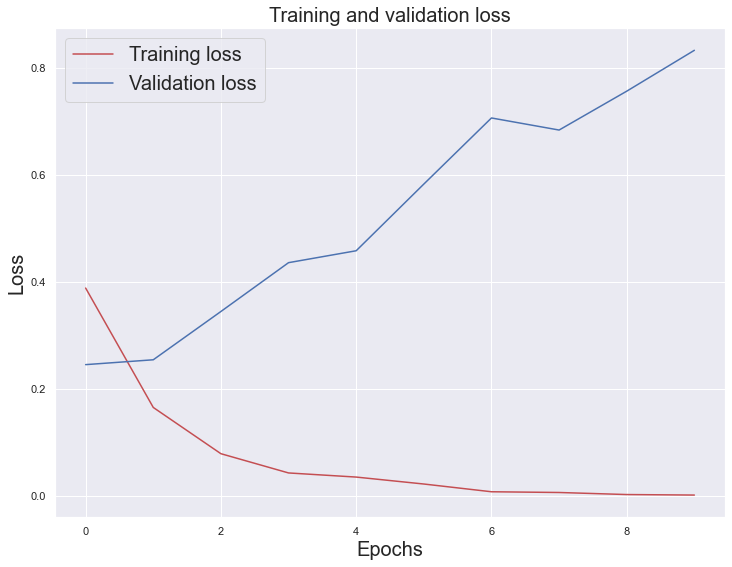

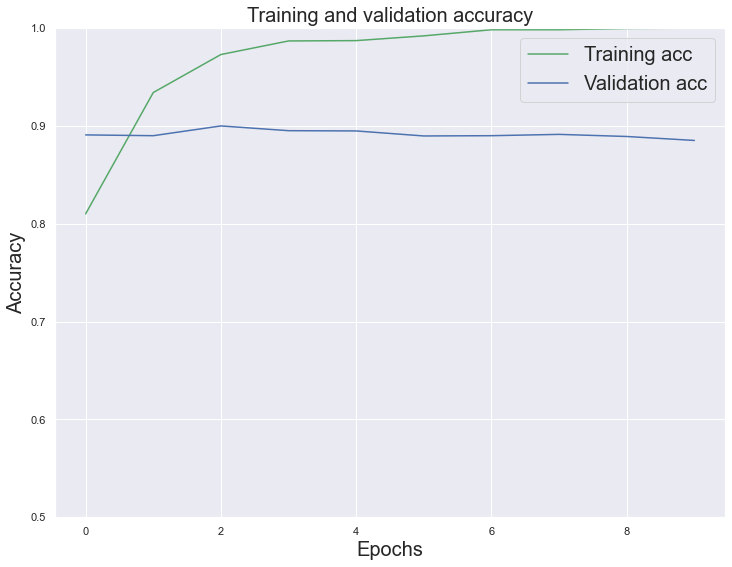

In [25]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.savefig('Training and Validation Loss BLSTM.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.savefig('Training and Validation Accuracy BLSTM.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

In [26]:
pred = model.predict_classes(testX)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testY,pred)

In [28]:
pred = model.predict(testX)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
print('Accuracy on testing set:', accuracy_score(binary_predictions, testY))
print('Precision on testing set:', precision_score(binary_predictions, testY))
print('Recall on testing set:', recall_score(binary_predictions, testY))

Accuracy on testing set: 0.885144243731464
Precision on testing set: 0.8703134603564844
Recall on testing set: 0.8681790312691601


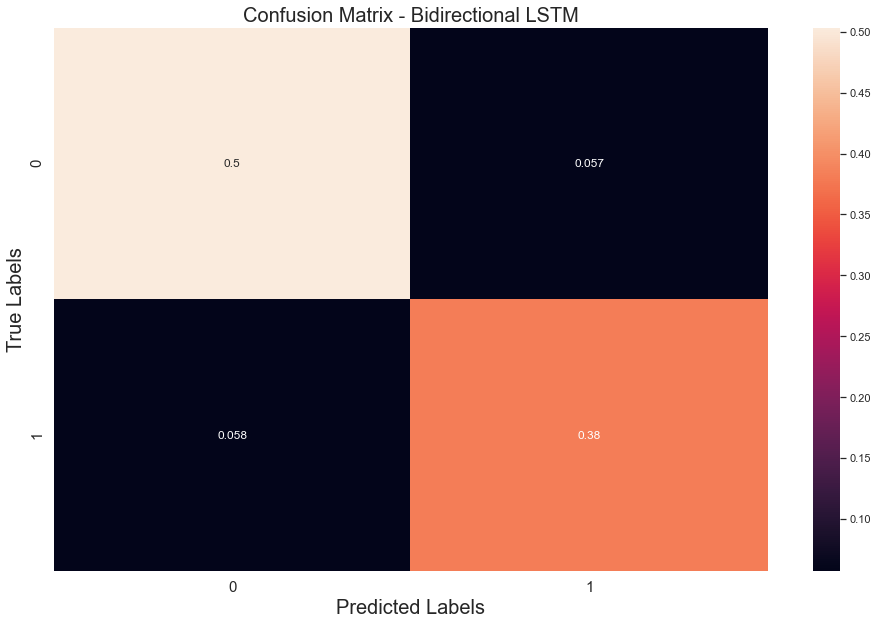

In [30]:

matrix = confusion_matrix(binary_predictions, testY, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix - Bidirectional LSTM', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)
plt.savefig('Confusion Matrix BLSTM.jpg',bbox_inches = 'tight',transparent=True)


In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, binary_predictions)
from sklearn.metrics import accuracy_score
score_gnb = accuracy_score(testY,binary_predictions)
print(cm)

[[1867  215]
 [ 211 1416]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(binary_predictions, testY))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2078
           1       0.87      0.87      0.87      1631

    accuracy                           0.89      3709
   macro avg       0.88      0.88      0.88      3709
weighted avg       0.89      0.89      0.89      3709



0.950152092422125


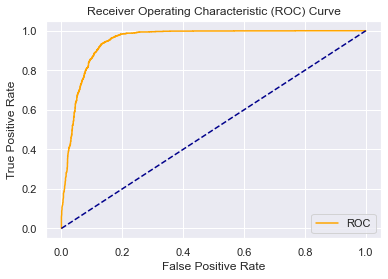

In [43]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score
probs = model.predict_proba(testX)  
probs = probs[:, 0]  
fper, tper, thresholds = roc_curve(testY, probs) 
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
auc = roc_auc_score(testY,probs)
print(auc)
plt.legend()
plt.savefig('Roc Curve BLSTM.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

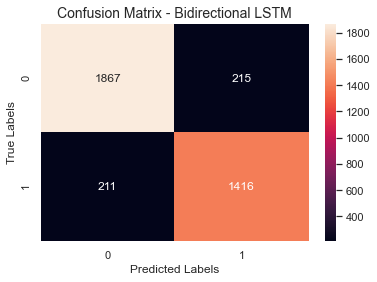

In [45]:
# Heatmap
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm,annot=True,fmt='g')
ax.set_xlabel('Predicted Labels', size=12)
ax.set_ylabel('True Labels', size=12)
ax.set_title('Confusion Matrix - Bidirectional LSTM', size=14) 

plt.savefig('Confusion Matrix BLSTM.jpg',bbox_inches = 'tight',transparent=True)